# Run MCMC sampling
# Heavy non-minimal OLD

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import dark_nus_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

In [4]:
spec = 'nonminimal'

In [5]:
this_dark_nus_mcmc = dark_nus_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance='log', smoothing_pars=(0.1, 0.1))
df = this_dark_nus_mcmc.provide_df('cut_based')

heavy majorana


In [6]:
ndim = 4
from ctau_utils import ctau_heavy
def heavy_nonminimal_posterior(parameters):
    '''Posterior in the minimal model: parameters = [m4, mz, mu_Vmu4_alpha_epsilon2]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0]) or\
       (parameters[0] > this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1]) or\
       (parameters[1] < this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0]) or\
       (parameters[1] > this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1] or\
       (parameters[0] >= parameters[1])) or\
       (parameters[2] <= 0) or\
       (parameters[2] > this_dark_nus_mcmc.exp_analysis_obj.upper_bound_mu_minimal):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_Vmu4_alpha_epsilon2 = this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2 * parameters[2]
        if (parameters[3] < actual_Vmu4_alpha_epsilon2) or (parameters[3] > 0.000018):
            return -np.inf, -np.inf, -np.inf, -np.inf
        ctau = ctau_heavy(parameters[0], 
                          parameters[1], 
                          parameters[3], 
                          D_or_M)
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(parameters[0], parameters[1]),
                                                         ctau=ctau,
                                                         mu=parameters[2],
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = [r'$m_4$ [GeV]', r'$m_Z$ [GeV]', r'$\mu$']
physics_labels = [r'$\log_{10}(V_{\mu 4}\alpha \epsilon^2)$', r'$\log_{10}(c\tau$)']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [7]:
this_dark_nus_mcmc.set_posterior(heavy_nonminimal_posterior, 
                                 ndim, 
                                 ctau=ctau_heavy, 
                                 labels=labels)

In [8]:
n_walkers = 16
n_samples = 10000
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool, log_mu=True, print_p0=True,
                                       set_backend=False, blobs_dtype=blobs_dtype)
    this_dark_nus_mcmc.run_mcmc(n_samples)

[2.32973096e-02 4.28604649e+00 1.71471857e+06 1.49260888e-06] (-10243.5828803599, 14777.36622243032, 14777.36622243032, 49011.75093444906)
[1.02640524e-01 1.58716415e+00 1.73847298e+06 1.16365554e-06] (-408517004.1237335, 423953193.9753952, 32437466.246437177, 0.712223373608056)
[1.76777056e-01 9.44477094e+00 2.14666322e+01 7.18610153e-10] (-0.36200874890923024, 0.006084722772363898, 0.0026100905825900975, 95431.21777783104)
[6.70167374e-01 8.97029582e+00 7.56181900e+05 4.48674158e-07] (-169.6141916609863, 203.44119340737416, 87.36841326762587, 0.15882804276342985)
[3.49716819e-01 6.33321009e+00 2.47891103e+00 9.25424781e-13] (0, 0.0, 0.0, 494446.6561234271)
[2.12283123e-01 9.72600233e+00 1.89845743e+02 5.38656686e-08] (-15.687024522017055, 15.896252813573621, 0.48882795070012774, 573.3181101022222)
[4.58164535e-01 5.71407444e+00 3.17297170e+00 2.09788235e-07] (-0.2096895154439603, 0.09152502802185886, 0.01205261381939434, 0.3744921241827087)
[1.07642553e-01 8.92160030e+00 4.37063621e+

100%|██████████| 10000/10000 [16:27<00:00, 10.13it/s]


In [9]:
this_dark_nus_mcmc.compute_autocorrelation_time()

N/50 = 200;
tau: [394.44652322 240.78447546 320.49648546 260.9114077 ]


array([394.44652322, 240.78447546, 320.49648546, 260.9114077 ])

In [10]:
# this_dark_nus_mcmc.get_raw_and_processed_chains(physics_labels=physics_labels, discard=2, thin=0.5)
this_dark_nus_mcmc.get_raw_and_processed_chains(physics_labels=physics_labels, discard=0, thin=1)

N/50 = 200;
tau: [394.44652322 240.78447546 320.49648546 260.9114077 ]


IndexError: list index out of range

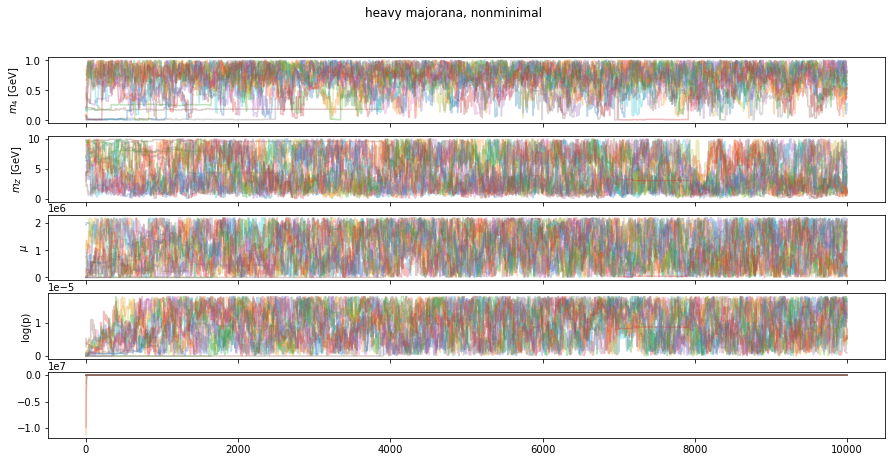

In [11]:
this_dark_nus_mcmc.plot_chains(store=True)

IndexError: list index out of range

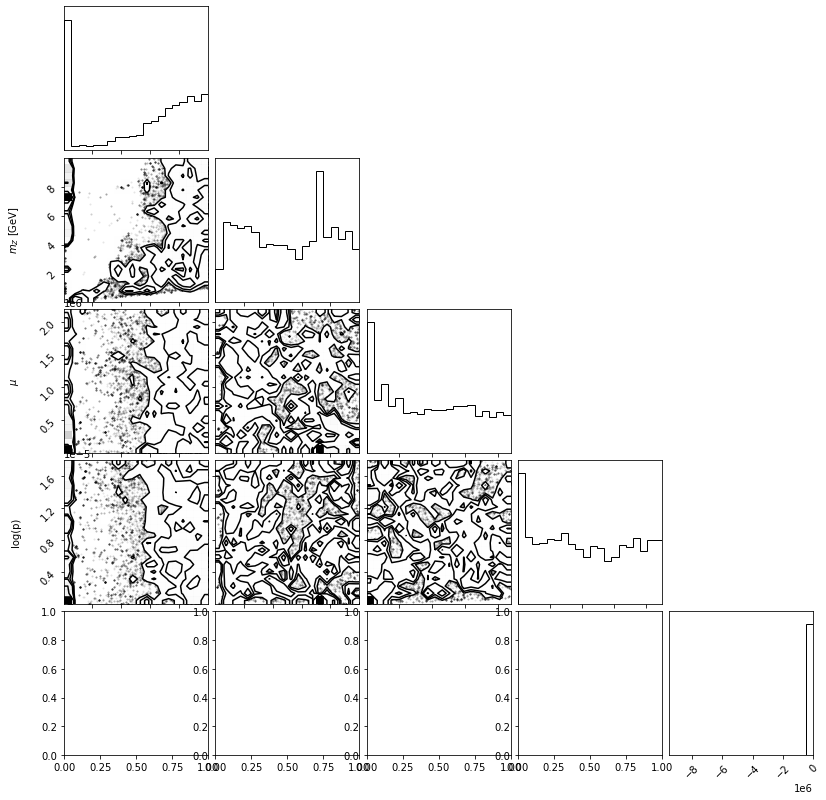

In [53]:
this_dark_nus_mcmc.corner_plot_raw(store=True)

IndexError: list index out of range

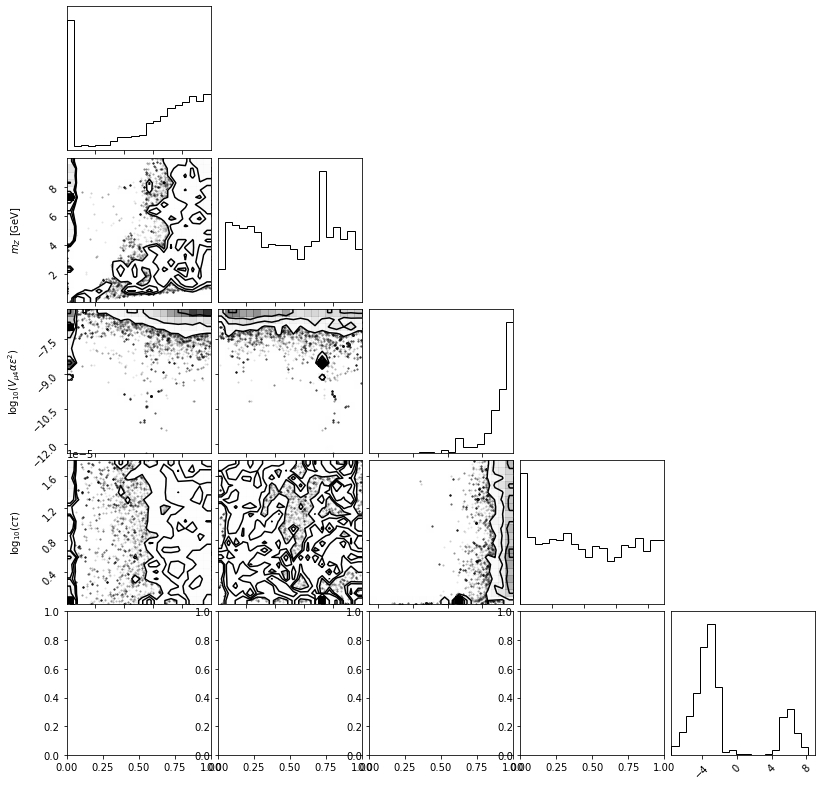

In [54]:
this_dark_nus_mcmc.corner_plot_physics(store=True)